In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
pd.options.display.max_columns = None

In [5]:
from sklearn.preprocessing import StandardScaler

In [11]:
data = pd.read_csv('creditcard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [12]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [14]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [15]:
sc = StandardScaler()
data['Amount']=sc.fit_transform(pd.DataFrame(data['Amount']))

In [16]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [17]:
data.shape

(284807, 31)

In [18]:
data = data.drop_duplicates()

In [19]:
data.shape

(283726, 31)

In [20]:
import seaborn as sns

<Axes: ylabel='count'>

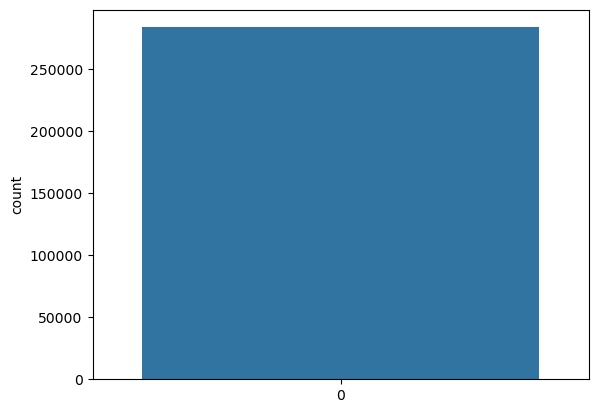

In [21]:
sns.countplot(data['Class'])

In [22]:
X = data.drop('Class',axis=1)
y = data['Class']

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,
                                                 random_state=42)

In [24]:
normal = data[data['Class']==0]
fraud = data[data['Class']==1]

In [25]:
normal.shape

(283253, 31)

In [26]:
fraud.shape

(473, 31)

In [27]:
normal_sample=normal.sample(n=473)

In [28]:
normal_sample.shape

(473, 31)

In [29]:
new_data = pd.concat([normal_sample,fraud],ignore_index=True)

In [30]:
new_data['Class'].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

In [31]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,136772.0,2.040911,-0.176893,-1.747453,0.454685,0.237407,-0.905226,0.304443,-0.190664,0.396658,0.353658,0.192400,-0.052631,-2.011770,0.972675,-0.935012,-0.202653,-0.353738,0.023292,0.560403,-0.326442,-0.012981,0.035215,0.031078,-0.334777,0.164304,0.385097,-0.101010,-0.089704,-0.295817,0
1,67424.0,-0.727194,0.957198,1.513320,-0.120384,-0.350920,-0.779693,0.423669,0.214173,-0.114100,0.236523,1.097739,-0.553200,-2.476189,0.756478,0.412155,0.427461,-0.442386,0.354276,0.213263,0.079792,-0.219994,-0.663231,0.043154,0.446988,-0.277159,0.054034,0.350607,0.174487,-0.331320,0
2,53809.0,-1.309182,2.643591,-0.673922,2.856275,-0.569337,-0.807564,-0.158952,1.101358,-1.636385,1.075114,-0.991935,0.152057,0.380580,1.305396,0.638051,-0.100245,0.540601,-0.061017,0.684912,0.107871,0.205377,0.532638,0.229646,0.401670,-0.838382,0.113539,0.326430,0.243853,-0.349231,0
3,57797.0,1.560981,-0.998394,0.226563,-1.433524,-1.370268,-0.765205,-0.971860,-0.178882,-1.704827,1.463982,-1.041995,-1.414972,-0.116646,-0.198439,0.679430,-0.224227,0.368131,0.205312,-0.051232,-0.365099,-0.257314,-0.369858,-0.015418,-0.157180,0.431324,-0.172526,0.025454,0.013771,-0.313249,0
4,35907.0,-1.150108,0.299756,1.841853,-1.692589,-1.393184,-0.496669,-0.657656,0.624924,-0.807415,-0.040276,-0.384929,-1.229749,-1.052294,-0.052265,0.814119,1.414488,0.432641,-1.140374,-0.820167,-0.038197,0.506139,1.253691,-0.168647,0.409560,-0.017321,-0.180345,0.113818,0.083364,-0.233487,0


In [32]:
X = new_data.drop('Class',axis=1)
y = new_data['Class']

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,
                                                 random_state=42)

In [34]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [35]:
y_pred1 = log.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(y_test,y_pred1)

0.9157894736842105

In [38]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [39]:
precision_score(y_test,y_pred1)

0.9574468085106383

In [40]:
recall_score(y_test,y_pred1)

0.8823529411764706

In [41]:
f1_score(y_test,y_pred1)

0.9183673469387754

In [42]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [43]:
y_pred2 = dt.predict(X_test)

In [44]:
accuracy_score(y_test,y_pred2)

0.9105263157894737

In [45]:
precision_score(y_test,y_pred2)

0.912621359223301

In [46]:
recall_score(y_test,y_pred2)

0.9215686274509803

In [47]:
f1_score(y_test,y_pred2)

0.9170731707317074

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [49]:
y_pred3 = rf.predict(X_test)

In [50]:
accuracy_score(y_test,y_pred3)

0.9526315789473684

In [51]:
precision_score(y_test,y_pred3)

0.9894736842105263

In [52]:
recall_score(y_test,y_pred3)

0.9215686274509803

In [53]:
f1_score(y_test,y_pred3)

0.9543147208121827

In [54]:
final_data = pd.DataFrame({'Models':['LR','DT','RF'],
              "ACC":[accuracy_score(y_test,y_pred1)*100,
                     accuracy_score(y_test,y_pred2)*100,
                     accuracy_score(y_test,y_pred3)*100
                    ]})

In [55]:
final_data

,Models,ACC
0,LR,91.578947
1,DT,91.052632
2,RF,95.263158


In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Models', ylabel='ACC'>

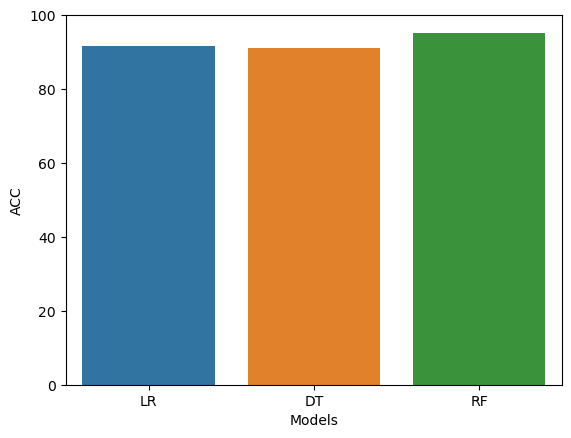

In [57]:
sns.barplot(x=final_data['Models'], y=final_data['ACC'])

In [58]:
X = data.drop('Class',axis=1)
y = data['Class']

In [59]:
X.shape

(283726, 30)

In [60]:
y.shape

(283726,)

In [61]:
from imblearn.over_sampling import SMOTE

In [62]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [63]:
y_res.value_counts()

Class
0    283253
1    283253
Name: count, dtype: int64

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.20,
                                                 random_state=42)

In [65]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [66]:
y_pred1 = log.predict(X_test)

In [67]:
accuracy_score(y_test,y_pred1)

0.9703359164004166

In [68]:
precision_score(y_test,y_pred1)

0.9793481768312359

In [69]:
recall_score(y_test,y_pred1)

0.9611358398282869

In [70]:
f1_score(y_test,y_pred1)

0.9701565427406966

In [78]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [79]:
y_pred2 = dt.predict(X_test)

In [80]:
accuracy_score(y_test,y_pred2)

0.9983760216059734

In [81]:
precision_score(y_test,y_pred2)

0.9977508741719527

In [82]:
recall_score(y_test,y_pred2)

0.9990147609915727

In [83]:
f1_score(y_test,y_pred2)

0.9983824175824176

In [86]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [87]:
y_pred3 = rf.predict(X_test)

In [88]:
accuracy_score(y_test,y_pred3)

0.9999117403046724

In [89]:
precision_score(y_test,y_pred3)

0.9998240954106493

In [90]:
recall_score(y_test,y_pred3)

1.0

In [91]:
f1_score(y_test,y_pred3)

0.999912039969038

In [92]:
final_data = pd.DataFrame({'Models':['LR','DT','RF'],
              "ACC":[accuracy_score(y_test,y_pred1)*100,
                     accuracy_score(y_test,y_pred2)*100,
                     accuracy_score(y_test,y_pred3)*100
                    ]})

In [93]:
final_data

,Models,ACC
0,LR,97.033592
1,DT,99.837602
2,RF,99.991174


In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Models', ylabel='ACC'>

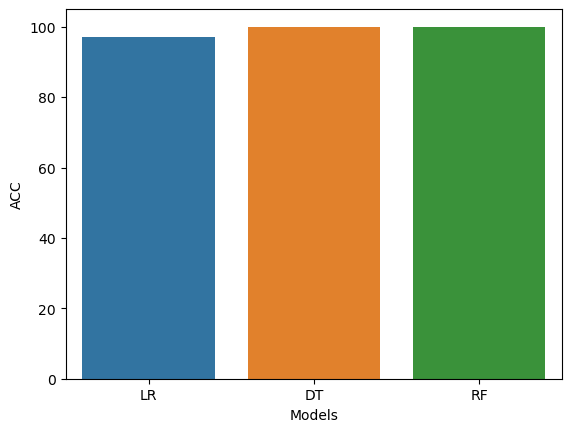

In [95]:
sns.barplot(x=final_data['Models'], y=final_data['ACC'])

In [96]:
rf1 = RandomForestClassifier()
rf1.fit(X_res,y_res)

RandomForestClassifier()

In [97]:
import joblib

In [98]:
joblib.dump(rf1,"credit_card_model")

['credit_card_model']

In [99]:
model = joblib.load("credit_card_model")

In [100]:
import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names")

In [101]:
pred = model.predict([[1,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])

In [102]:
if pred == 0:
    print("Normal Transcation")
else:
    print("Fraudulent Transcation")

Normal Transcation
